In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [13]:
# Read the new data and populate the old data
obsdata = pd.read_csv('../data_files/good_qual_10deg.csv', parse_dates=['Date'])
len(obsdata)

3469

-0.6064637841025058 1.5591687700059627 0.24030288611396158
-0.46078766671415344 0.508509405438777 0.18171907372611282
-0.3499650996079847 0.378033956909519 0.15977053675349698
-0.3099518725317127 0.33144264430702536 0.14743514582822345
-0.29400137928935566 0.30001718030782065 0.13984075847422928
-0.28238395915375847 0.2838709484846587 0.1349573524361991
-0.26869383905658806 0.27231485422042895 0.1314425510377489
-0.2603687668574399 0.26426976193350976 0.1296668368361179
-0.2567528755669221 0.2606207182617731 0.1280314877039981
-0.2548911665629019 0.25590597429179357 0.1269681177877107
-0.2530510830797948 0.25497016365124925 0.12641110855889362
-0.25301017236644885 0.25294935076621333 0.12606264775092205
-0.2521636882692483 0.251848007475695 0.12592470569256223
-0.2519038531329127 0.25173308455126153 0.12578762005348598
-0.2516333526330141 0.25177485542698025 0.1255819849032291
-0.2506641872185228 0.2505051085494352 0.12530726003405773
-0.25070909856856866 0.2503563283490025 0.125239110

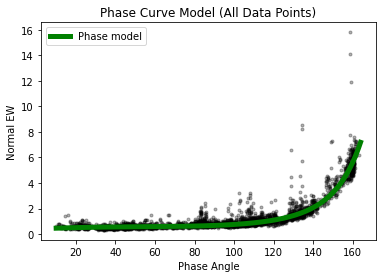

In [66]:
phaseobs = obsdata.copy()
nstd = 2
while True:
    coeff = np.polyfit(phaseobs['Mean Phase'], np.log10(phaseobs['Normal EW']), 3)
    phase_model = 10**np.polyval(coeff, phaseobs['Mean Phase'])
    phaseobs['Phase Ratio'] = ratio = np.log(phaseobs['Normal EW'] / phase_model)
    std = np.std(ratio)
    print(ratio.min(), ratio.max(), std)
    oldlen = len(phaseobs)
    phaseobs = phaseobs[phaseobs['Phase Ratio'].abs() < nstd*std]
    if len(phaseobs) != oldlen:
        continue
    break
    
obsdata['Phase Model'] = 10**np.polyval(coeff, obsdata['Mean Phase'])
xrange = np.arange(obsdata['Mean Phase'].min(), obsdata['Mean Phase'].max()+1)
#plt.errorbar(phaseobs['Mean Phase'], phaseobs['Normal EW'], yerr=phaseobs['Normal EW Std'], fmt='.', color='black', alpha=0.1)
plt.plot(obsdata['Mean Phase'], obsdata['Normal EW'], '.', color='black', alpha=0.3)
phase_model = 10**np.polyval(coeff, xrange)
plt.plot(xrange, phase_model, '-', color='green', lw=5, label='Phase model')
# plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
_=plt.title('Phase Curve Model (All Data Points)')

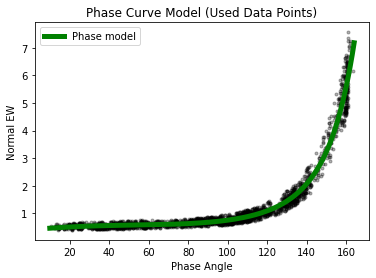

In [67]:
plt.plot(phaseobs['Mean Phase'], phaseobs['Normal EW'], '.', color='black', alpha=0.3)
plt.plot(xrange, phase_model, '-', color='green', lw=5, label='Phase model')
# plt.yscale('log')
plt.legend()
plt.xlabel('Phase Angle')
plt.ylabel('Normal EW')
_=plt.title('Phase Curve Model (Used Data Points)')

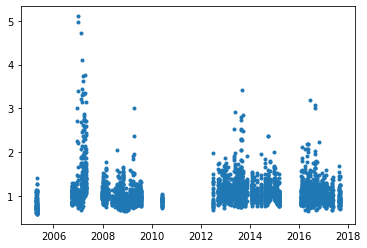

In [69]:
obsdata['Phase Curve Ratio'] = obsdata['Normal EW'] / obsdata['Phase Model']
plt.plot(obsdata['Date'], obsdata['Phase Curve Ratio'], '.')

1970-01-01T00:00:00


0       12886.188333
1       12886.170741
2       12886.153333
3       12886.135741
4       12886.119444
            ...     
3464    17415.627350
3465    17415.607350
3466    17415.588090
3467    17415.578461
3468    17415.559201
Name: Date_secs, Length: 3469, dtype: float64

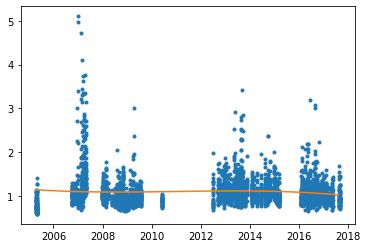

In [87]:
time0 = np.datetime64('1970-01-01T00:00:00')
print(time0)
obsdata['Date_secs'] = (obsdata['Date']-time0).dt.total_seconds()/86400
timecoeff = np.polyfit(obsdata['Date_secs'], obsdata['Phase Curve Ratio'], 3)
obsdata['Phase Curve Ratio'] = obsdata['Normal EW'] / obsdata['Phase Model']
plt.plot(obsdata['Date'], obsdata['Phase Curve Ratio'], '.')
timerange = np.arange(obsdata['Date_secs'].min(), obsdata['Date_secs'].max(), 100)
timefit = np.polyval(timecoeff, timerange)
plt.plot(timerange, timefit, '-')
obsdata['Date_secs']

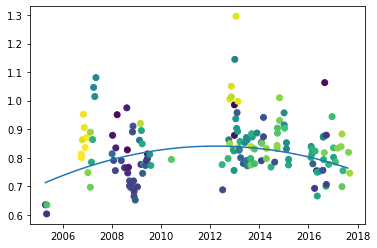

In [103]:
mindata=obsdata.groupby('Observation').min()
timecoeff = np.polyfit(mindata['Date_secs'], mindata['Phase Curve Ratio'], 2)
mindata['Phase Curve Ratio'] = mindata['Normal EW'] / mindata['Phase Model']
timerange = np.arange(obsdata['Date_secs'].min(), obsdata['Date_secs'].max(), 100)
timefit = np.polyval(timecoeff, timerange)
plt.scatter(mindata['Date'], mindata['Phase Curve Ratio'], c=mindata['Mean Phase'])
plt.plot(timerange, timefit, '-')